# Battle of Neighbourhoods


### Finding best place to start Cofee Shop business in Toronto City

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests # library to handle requests

import json 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!pip install openpyxl

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



### Vehicle and Foot Traffic

We begin by analyzing the data about the pedestrian and vehicle volumes. The first time you open it, you will soon realize that the column Main is the the main street name, and the same name appears several time indicating it contains intersections.

In [2]:
ft_df=pd.read_excel('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ae4e10a2-9eaf-4da4-83fb-f3731a30c124/resource/ea4d9b68-f645-4878-bd1d-d7273450255c/download/traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx',engine='openpyxl')
ft_df.head()

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,2017-06-21,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,2016-09-17,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,2016-11-08,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,2015-12-08,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,2016-09-17,14487,3368


In [3]:
ft_main = ft_df.groupby(by='Main')[['8 Peak Hr Pedestrian Volume','8 Peak Hr Vehicle Volume', 'Latitude', 'Longitude']].mean().sort_values(by='8 Peak Hr Pedestrian Volume', ascending=False).reset_index()
ft_main

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793
5,CHERRY ST,12802.000000,15814.000000,43.645257,-79.352682
6,SIMCOE ST,12058.000000,8156.500000,43.647364,-79.386061
7,ST GEORGE ST,11189.000000,6902.333333,43.661970,-79.397540
8,VICTORIA ST,10589.000000,11767.000000,43.651952,-79.377756
9,WELLINGTON ST W,10022.500000,8401.000000,43.645012,-79.390478


In [4]:
ft_main.describe()

,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
count,248.000000,248.000000,248.000000,248.000000
mean,1855.100736,11274.239194,43.710040,-79.395862
std,3190.819880,5193.129205,0.056145,0.102267
min,0.000000,1081.000000,43.603757,-79.622225
25%,343.500000,7403.750000,43.660016,-79.472370
50%,675.000000,10466.433824,43.703423,-79.390913
75%,1653.678571,13938.031250,43.761615,-79.330196
max,23335.000000,29797.428571,43.825259,-79.140419


We want our candidate neighborhoods to be lively. Hence, we filter out the roads. In this example, we only show the roads with an average of pedestrian volume above 1200 or vehicle volume above 12000 during peak hour (above ~70%). This gives us 139 main roads.

In [5]:
ft_main_top = ft_main[(ft_main['8 Peak Hr Pedestrian Volume']>1200) | (ft_main['8 Peak Hr Vehicle Volume']>12000)].reset_index()
ft_main_top.drop(columns='index', inplace=True)
print(ft_main_top.shape)
ft_main_top.head()

(139, 5)


,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


In [6]:
address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [7]:
# create map of Toronto using latitude and longitude values
ft_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, mainroad, pedes, vehic in zip(ft_main_top['Latitude'], ft_main_top['Longitude'], ft_main_top['Main'], ft_main_top['8 Peak Hr Pedestrian Volume'], ft_main_top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(ft_map_toronto)  
    
ft_map_toronto

Finally, we can visualize the roads using Folium Python module from the given coordinates. The map shows a glimpse of busiest roads in the city, where many are located around downtown, which is not surprising

### Crime Statistics

Next, we analyze the crime statistics data from 2014 to 2019. It gives us 206435 crime incidents segmented by police divisional boundaries, neighborhoods, and Major Crime Indicators (MCI). Toronto police divides the major crimes into 5 categories scattered to 17 divisions, and 140 listed neighborhoods.

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_53d73ac907d843aeaa022ac26e60ae7f = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_53d73ac907d843aeaa022ac26e60ae7f = 'https://s3.eu.cloud-object-storage.appdomain.cloud'

client_53d73ac907d843aeaa022ac26e60ae7f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4R3cSvsoI1ELgZLIumCQRixuAFH1Q3hzZ_52v894yjB6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_53d73ac907d843aeaa022ac26e60ae7f)

body = client_53d73ac907d843aeaa022ac26e60ae7f.get_object(Bucket='battleofneighboruhoods-donotdelete-pr-juy0wpov1dadxz',Key='Major_Crime_Indicators.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mci_df = pd.read_csv(body)
mci_df.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.859749e+06,5.423033e+06,10182,GO-20142103239,D23,2014/05/18 04:00:00+00,2014/05/18 04:00:00+00,House,1430,100,Assault,2014,May,18,138,Sunday,12,2014.0,May,18.0,138.0,Sunday,12,Assault,1,West Humber-Clairville (1),-79.588477,43.725321,1
1,-8.861050e+06,5.426864e+06,10298,GO-20142111528,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Outside,1430,100,Assault,2014,May,19,139,Monday,21,2014.0,May,19.0,139.0,Monday,20,Assault,1,West Humber-Clairville (1),-79.600166,43.750187,2
2,-8.861412e+06,5.422084e+06,10300,GO-20142111859,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Apartment,2120,200,B&E,2014,May,19,139,Monday,22,2014.0,May,19.0,139.0,Monday,22,Break and Enter,1,West Humber-Clairville (1),-79.603420,43.719158,3
3,-8.859955e+06,5.424372e+06,10345,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,100,Assault With Weapon,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,4
4,-8.859955e+06,5.424372e+06,10346,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,110,Assault Bodily Harm,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,5


In [8]:
mci_df.drop( columns=['X', 'Y', 'Index_', 'event_unique_id', 'ucr_code', 'ucr_ext', 'ObjectId'], inplace=True)
temp = mci_df['reportedyear']
mci_df = mci_df[[column for column in mci_df.columns if column.startswith('occ') is False and column.startswith('rep') is False]]
mci_df['reportedyear'] = temp
mci_df.head()

,Division,premises_type,offence,MCI,Hood_ID,Neighbourhood,Long,Lat,reportedyear
0,D23,House,Assault,Assault,1,West Humber-Clairville (1),-79.588477,43.725321,2014
1,D23,Outside,Assault,Assault,1,West Humber-Clairville (1),-79.600166,43.750187,2014
2,D23,Apartment,B&E,Break and Enter,1,West Humber-Clairville (1),-79.603420,43.719158,2014
3,D23,Outside,Assault With Weapon,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,2014
4,D23,Outside,Assault Bodily Harm,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,2014


In [9]:
mci_df.shape

(242879, 9)

In [10]:
len(mci_df['Hood_ID'].unique())

142

We will group the data based on division (Division), not neighborhood (Hood_ID). This will give us insight how to pick the safest boroughs and its neighborhoods for later.

In [11]:
mci_divison = mci_df.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
mci_divison.head()

,Division,premises_type,offence,MCI,Hood_ID,Neighbourhood,Long,Lat,reportedyear
0,D51,20472,20472,20472,20472,20472,20472,20472,20472
1,D32,18176,18176,18176,18176,18176,18176,18176,18176
2,D43,17936,17936,17936,17936,17936,17936,17936,17936
3,D41,17866,17866,17866,17866,17866,17866,17866,17866
4,D31,17773,17773,17773,17773,17773,17773,17773,17773


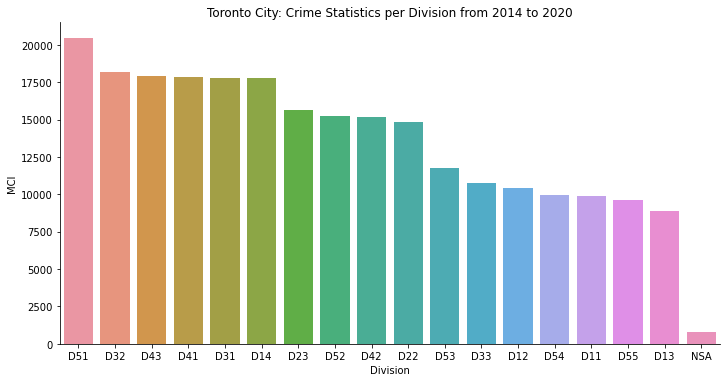

In [12]:
g = sns.catplot(data = mci_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division from 2014 to 2020')

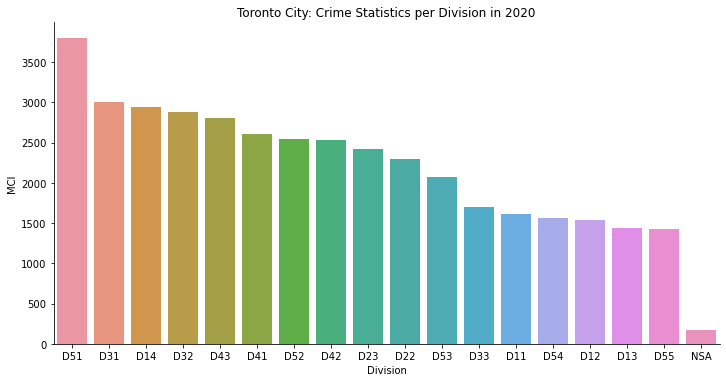

In [13]:
mci_2020 = mci_df[mci_df['reportedyear']==2019]
mci_2020_divison = mci_2020.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_2020_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division in 2020')

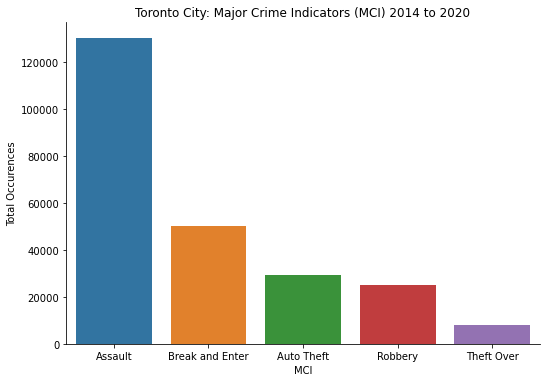

In [14]:
mci_group = mci_df.groupby(by='MCI').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_group, x='MCI', y='offence', kind='bar', aspect=1.5)
g.set(title='Toronto City: Major Crime Indicators (MCI) 2014 to 2020', ylabel='Total Occurences')

Among the 5 MCI, Assault incidents are still number one occurred the most for 6 consecutive years. During the same period, several divisions are consistent about their crime rates. Thus, the divisions fall into three categories:

High Crime Rates (D51, D43, D41, D32, D31, D14)
Middle Crime Rates (D52, D42, D23, D22)
Low Crime Rates (D55, D54, D53, D33, D13, D12, D11)
Finally, to pick the area of interest, the candidates are expected to be:

safe - having low crime rates
lively - crowded by people, vehicles, and easy to access
close to downtown.
Therefore, the divisions qualified are D55, D54, D53, and D13. These divisions cover:

Central Toronto (D53)
East York (D53, D54,D55)
York (D13)

D11,D12 are mostly westend of toronto which are safe but not lively.
In the next section, we will explore the neighborhoods inside Central Toronto, East York, and York as the selected boroughs.

### Neighborhoods Analysis


In [15]:

page=requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
print(page.status_code)

200


In [16]:
soup=BeautifulSoup(page.content,'html.parser')

print(soup.prettify())

# This is to print title of wiki page
soup.title.text

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"570a7ee5-48d6-4d2c-8506-941e5ef12751","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1019189119,"wgRevisionId":1019189119,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia

'List of postal codes of Canada: M - Wikipedia'

In [17]:
# Getting details of PostalCode,Borough,Neighborhood

table_contents=[]
tables = soup.find('table')
td=tables.find_all('td')
for row in td:
    cell={}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)


In [18]:

# print(table_contents)

import pandas as pd
import numpy as np
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Now try get postal codes and their latitude, longitude details from csv file in below address.

In [19]:
lat_lon=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv")
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
# Merging neighborhood details and lat_lon using postal code

lat_lon.rename(columns={'Postal Code':'PostalCode'},inplace=True)
Neighborhood_data=pd.merge(df,lat_lon,on='PostalCode')
Neighborhood_data.head()


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [37]:
boroughs_df = Neighborhood_data[(Neighborhood_data['Borough']=='Central Toronto') | (Neighborhood_data['Borough']=='East York') | (Neighborhood_data['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df

(19, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
1,M4C,East York,Woodbine Heights,43.695344,-79.318389
2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
3,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
4,M4G,East York,Leaside,43.709060,-79.363452
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372
6,M4J,East York,The Danforth East,43.685347,-79.338106
7,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
8,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
9,M5N,Central Toronto,Roselawn,43.711695,-79.416936


In [44]:
boroughs_df['Neighborhood'] = boroughs_df['Neighborhood'].apply(lambda x: x.split(',')[0])
boroughs_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4B,East York,Parkview Hill,43.706397,-79.309937
1,M4C,East York,Woodbine Heights,43.695344,-79.318389
2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
3,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
4,M4G,East York,Leaside,43.709060,-79.363452
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372
6,M4J,East York,The Danforth East,43.685347,-79.338106
7,M6M,York,Del Ray,43.691116,-79.476013
8,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
9,M5N,Central Toronto,Roselawn,43.711695,-79.416936


In [23]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.706397, -79.309937], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(Neighborhood_data['Latitude'], Neighborhood_data['Longitude'], Neighborhood_data['Borough'], Neighborhood_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [38]:
# create map of Toronto of selected boroughs using latitude and longitude values
map_Boroughs = folium.Map(location=[43.706397, -79.309937], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(boroughs_df['Latitude'], boroughs_df['Longitude'], boroughs_df['Borough'], boroughs_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boroughs)  
    
map_Boroughs

In [45]:
# @hidden_cell
CLIENT_ID = 'ZRQ0OLCGACLLZ3EFGOIDR0KPS5C0Z0SFEA5WTXYPAGIN31Z1' # your Foursquare ID
CLIENT_SECRET = 'WMHIYFRTKVTMVIFQUKQGDMQRRTQ3NZXETJELOSR2S0O1NC4C' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius=1000
# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
         # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [47]:

#Borough venues
borough_venues = getNearbyVenues(names=boroughs_df['Neighborhood'],
                                   latitudes=boroughs_df['Latitude'],
                                   longitudes=boroughs_df['Longitude']
                                  )

Parkview Hill
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
The Danforth  East
Del Ray
Lawrence Park
Roselawn
Runnymede
Weston
Davisville North
Forest Hill North & West
North Toronto West
The Annex
Davisville
Moore Park
Summerhill West


In [48]:
print(borough_venues.shape)
borough_venues.head()

#borough_venues.groupby('Neighborhood').count()

(900, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,Parkview Hill,43.706397,-79.309937,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
2,Parkview Hill,43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
3,Parkview Hill,43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
4,Parkview Hill,43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy


In [49]:
# one hot encoding
borough_onehot = pd.get_dummies(borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
borough_onehot['Neighborhoods'] = borough_venues['Neighborhood'] 
borough_onehot.shape

(900, 170)

In [50]:
# move neighborhood column to the first column
fixed_column = [borough_onehot.columns[-1]] + list(borough_onehot.columns[:-1])
borough_onehot = borough_onehot[fixed_column]

borough_onehot.head()


,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Arts Building,College Gym,College Quad,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Museum,Music School,Nail Salon,Optical Shop,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Poutine Place,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
borough_grouped = borough_onehot.groupby('Neighborhoods').mean().reset_index()
borough_grouped

,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Arts Building,College Gym,College Quad,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Museum,Music School,Nail Salon,Optical Shop,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Poutine Place,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.047619,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.047619,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.047619,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.047619,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.047619,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.010000,0.000000,0.000000,0.00,0.000000,0.020000,0.010000,0.01000

In [52]:
borough_grouped.shape

(19, 170)

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        # Add column names such as 1st, 2nd, 3rd Most Common Venue
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        # Add column names such as 4th, 5th, .. ,10th Most Common Venue
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# In the end, we have:
# columns == ['Neighborhood', '1st Most Common Venue', .. , '10th Most Common Venue']        

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = borough_grouped['Neighborhoods']

for ind in np.arange(borough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(borough_grouped.iloc[ind, :], num_top_venues)

In [55]:
neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Park,Pharmacy,Bus Stop,Bakery,Fast Food Restaurant,Mexican Restaurant,Falafel Restaurant,Coffee Shop,Café,Bank
1,Davisville,Coffee Shop,Sushi Restaurant,Italian Restaurant,Café,Sandwich Place,Pub,Pizza Place,Fast Food Restaurant,Bank,Restaurant
2,Davisville North,Coffee Shop,Pizza Place,Italian Restaurant,Fast Food Restaurant,Café,Restaurant,Sushi Restaurant,Sandwich Place,Food & Drink Shop,Clothing Store
3,Del Ray,Furniture / Home Store,Intersection,Grocery Store,Convenience Store,Dessert Shop,Playground,Shopping Mall,Sandwich Place,Park,Gas Station
4,Forest Hill North & West,Coffee Shop,Sushi Restaurant,Café,Park,Bank,Trail,Playground,Liquor Store,Italian Restaurant,Japanese Restaurant


In [56]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 271 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 15.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


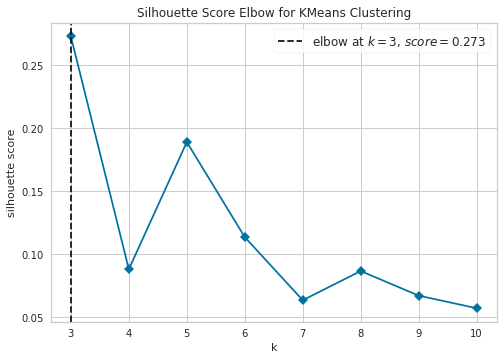

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
kclusters = (3,11)

boroughs_grouped_clustering = borough_grouped.drop('Neighborhoods', 1)

# run k-means clustering
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(boroughs_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

In [58]:
# run k-means clustering
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [59]:
# add clustering labels
ar=np.array(kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels']=ar
boroughs_merged=boroughs_df

#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', int(kmeans.labels_)
#neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

#boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

boroughs_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.706397,-79.309937,Bakery,Gym / Fitness Center,Coffee Shop,Brewery,Pizza Place,Intersection,Athletics & Sports,Soccer Stadium,Flea Market,Construction & Landscaping,1
1,M4C,East York,Woodbine Heights,43.695344,-79.318389,Coffee Shop,Sandwich Place,Café,Thai Restaurant,Convenience Store,Beer Store,Pizza Place,Pub,Pastry Shop,Park,1
2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,Pizza Place,Convenience Store,Park,Grocery Store,Coffee Shop,Sandwich Place,Chinese Restaurant,Restaurant,Dance Studio,Playground,1
3,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,Park,Pharmacy,Bus Stop,Bakery,Fast Food Restaurant,Mexican Restaurant,Falafel Restaurant,Coffee Shop,Café,Bank,1
4,M4G,East York,Leaside,43.709060,-79.363452,Coffee Shop,Sporting Goods Shop,Grocery Store,Burger Joint,Brewery,Electronics Store,Bank,Sandwich Place,Sushi Restaurant,Sports Bar,1


In [60]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighborhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,1,Bakery,Gym / Fitness Center,Coffee Shop,Brewery,Pizza Place,Intersection,Athletics & Sports,Soccer Stadium,Flea Market,Construction & Landscaping
1,East York,Woodbine Heights,1,Coffee Shop,Sandwich Place,Café,Thai Restaurant,Convenience Store,Beer Store,Pizza Place,Pub,Pastry Shop,Park
2,York,Humewood-Cedarvale,1,Pizza Place,Convenience Store,Park,Grocery Store,Coffee Shop,Sandwich Place,Chinese Restaurant,Restaurant,Dance Studio,Playground
3,York,Caledonia-Fairbanks,1,Park,Pharmacy,Bus Stop,Bakery,Fast Food Restaurant,Mexican Restaurant,Falafel Restaurant,Coffee Shop,Café,Bank
4,East York,Leaside,1,Coffee Shop,Sporting Goods Shop,Grocery Store,Burger Joint,Brewery,Electronics Store,Bank,Sandwich Place,Sushi Restaurant,Sports Bar
5,East York,Thorncliffe Park,1,Coffee Shop,Grocery Store,Pizza Place,Indian Restaurant,Burger Joint,Afghan Restaurant,BBQ Joint,Brewery,Sandwich Place,Supermarket
6,East York,The Danforth East,1,Coffee Shop,Café,Greek Restaurant,Park,Pizza Place,Fast Food Restaurant,Convenience Store,Pharmacy,Restaurant,Gastropub
7,York,Del Ray,0,Furniture / Home Store,Intersection,Grocery Store,Convenience Store,Dessert Shop,Playground,Shopping Mall,Sandwich Place,Park,Gas Station
8,Central Toronto,Lawrence Park,2,Trail,Café,Gym / Fitness Center,College Quad,College Gym,Coffee Shop,Bookstore,Park,Performing Arts Venue,Music School
9,Central Toronto,Roselawn,1,Coffee Shop,Playground,Pharmacy,Italian Restaurant,Café,Sushi Restaurant,Bank,Gastropub,Pilates Studio,Pet Store


In [61]:
# create map
map_clusters = folium.Map(location=[43.69479, -79.41440], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['Latitude'], boroughs_merged['Longitude'], boroughs_merged['Neighborhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [62]:
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_0

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Del Ray,Furniture / Home Store,Intersection,Grocery Store,Convenience Store,Dessert Shop,Playground,Shopping Mall,Sandwich Place,Park,Gas Station,0


### Cluster 2

In [63]:
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_1.shape)
cluster_1

(17, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Parkview Hill,Bakery,Gym / Fitness Center,Coffee Shop,Brewery,Pizza Place,Intersection,Athletics & Sports,Soccer Stadium,Flea Market,Construction & Landscaping,1
1,Woodbine Heights,Coffee Shop,Sandwich Place,Café,Thai Restaurant,Convenience Store,Beer Store,Pizza Place,Pub,Pastry Shop,Park,1
2,Humewood-Cedarvale,Pizza Place,Convenience Store,Park,Grocery Store,Coffee Shop,Sandwich Place,Chinese Restaurant,Restaurant,Dance Studio,Playground,1
3,Caledonia-Fairbanks,Park,Pharmacy,Bus Stop,Bakery,Fast Food Restaurant,Mexican Restaurant,Falafel Restaurant,Coffee Shop,Café,Bank,1
4,Leaside,Coffee Shop,Sporting Goods Shop,Grocery Store,Burger Joint,Brewery,Electronics Store,Bank,Sandwich Place,Sushi Restaurant,Sports Bar,1
5,Thorncliffe Park,Coffee Shop,Grocery Store,Pizza Place,Indian Restaurant,Burger Joint,Afghan Restaurant,BBQ Joint,Brewery,Sandwich Place,Supermarket,1
6,The Danforth East,Coffee Shop,Café,Greek Restaurant,Park,Pizza Place,Fast Food Restaurant,Convenience Store,Pharmacy,Restaurant,Gastropub,1
9,Roselawn,Coffee Shop,Playground,Pharmacy,Italian Restaurant,Café,Sushi Restaurant,Bank,Gastropub,Pilates Studio,Pet Store,1
10,Runnymede,Coffee Shop,Brewery,Pizza Place,Convenience Store,Fast Food Restaurant,Beer Store,Pharmacy,Sandwich Place,Park,Café,1
11,Weston,Pizza Place,Park,Skating Rink,Sandwich Place,Fried Chicken Joint,Furniture / Home Store,Restaurant,Middle Eastern Restaurant,Train Station,Coffee Shop,1


In [66]:
first = cluster_1.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first

,Venue,Neighborhood
0,Coffee Shop,11
1,Italian Restaurant,2
2,Pizza Place,2
3,Bakery,1
4,Park,1


In [69]:
second = cluster_1[['Neighborhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
second.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second

,Venue,Neighborhood
0,Park,3
1,Sandwich Place,2
2,Sushi Restaurant,2
3,Brewery,1
4,Café,1
5,Coffee Shop,1
6,Convenience Store,1
7,Grocery Store,1
8,Gym / Fitness Center,1
9,Pharmacy,1


In [70]:
third = cluster_1[['Neighborhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
third.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third

,Venue,Neighborhood
0,Café,3
1,Coffee Shop,2
2,Italian Restaurant,2
3,Pizza Place,2
4,Skating Rink,2
5,Bus Stop,1
6,Greek Restaurant,1
7,Grocery Store,1
8,Park,1
9,Pharmacy,1


In [72]:
cluster_0_top3 = pd.concat([first, second, third])
cluster_0_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighborhood', ascending=False)
cluster_0_top3

,Neighborhood
Venue,
Coffee Shop,14
Park,5
Pizza Place,5
Italian Restaurant,4
Café,4
Sushi Restaurant,3
Grocery Store,2
Pharmacy,2
Sandwich Place,2


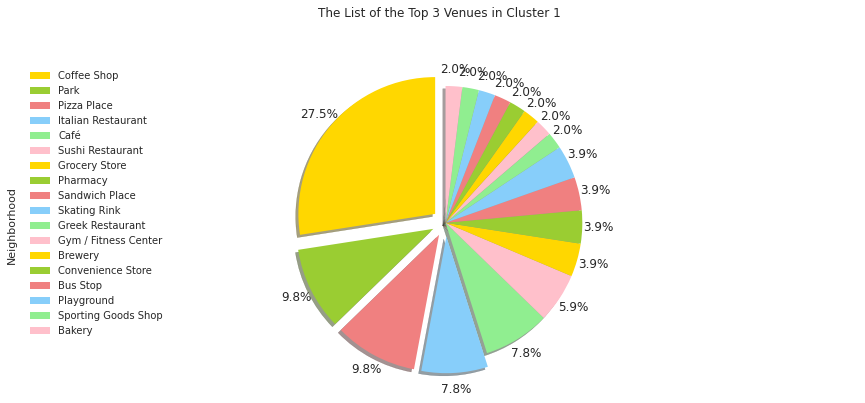

In [75]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each venue with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0]

cluster_0_top3['Neighborhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('The List of the Top 3 Venues in Cluster 1', y=1.12, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=cluster_0_top3.index, loc='upper left') 

plt.show()

### Cluster 3

In [64]:
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_2.shape)
cluster_2

(1, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
8,Lawrence Park,Trail,Café,Gym / Fitness Center,College Quad,College Gym,Coffee Shop,Bookstore,Park,Performing Arts Venue,Music School,2


Let's merge cluster 0, cluste 2

In [76]:
cluster_merged = pd.concat([ cluster_0, cluster_2]).reset_index()
column = [column for column in cluster_merged.columns if column.endswith('Venue')]
cluster_merged[['Cluster Labels','Neighborhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,Del Ray,Furniture / Home Store,Intersection,Grocery Store,Convenience Store,Dessert Shop
2,Lawrence Park,Trail,Café,Gym / Fitness Center,College Quad,College Gym


Del Ray, Lawrence Park are best neighbourhoods for a coffee shop because cluster1 has lot more coffe shops and a heavy competition. But we have to look for a better area in those neighborhoods.